In [1]:
import argparse

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader

import preprocess as p
from main import load_mnist
# import models as m


C:\Users\resor\anaconda3\envs\py37_lbm\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] 指定されたプロシージャが見つかりません。
  warn(f"Failed to load image Python extension: {e}")


In [3]:
FPS = 50
LENGTH_SEC = 5
NUM_FRAMES = FPS * LENGTH_SEC
MAX_SPEED = 3
IMG_SIZE = 28
CHANNELS = 1


# parser = argparse.ArgumentParser()
parser = argparse.ArgumentParser()
parser.add_argument("--min_freq", type=float, default=0.5, help="minimum frequency")
parser.add_argument("--max_freq", type=float, default=5, help="minimum frequency")
parser.add_argument("--random_phase", type=int, default=1, help="1: apply random phase, 0: default")
parser.add_argument("--FPS", type=int, default=FPS)
parser.add_argument("--LENGTH_SEC", type=int, default=LENGTH_SEC)
# parser.add_argument("--batch_size", type=int, default=4, help="size of mini-batches")
parser.add_argument("--batch_size", type=int, default=2, help="size of mini-batches")
# parser.add_argument("--batch_size", type=int, default=8, help="size of mini-batches")
parser.add_argument("--n_epochs", type=int, default=15, help="epochs")
parser.add_argument("--NUM_SELF_CON_SIMPER", type=int, default=10)
parser.add_argument("--MAX_SPEED", type=int, default=MAX_SPEED)
parser.add_argument("--SSL_FRAMES", type=int, default=NUM_FRAMES // MAX_SPEED)
parser.add_argument("--IMG_SIZE", type=int, default=IMG_SIZE)
parser.add_argument("--CHANNELS", type=int, default=CHANNELS)
parser.add_argument("--extract_time_frames", type=int, default=80)
# parser.add_argument("--lr", type=float, default=2e-3, help="Learning Rate")
parser.add_argument("--lr", type=float, default=1e-3, help="Learning Rate")
parser.add_argument("--DEBUG", type=int, default=1)
parser.add_argument("--num_workers", type=int, default=1)
# parser.add_argument("--experiment_name", type=str, default='FPS 50, Seq Length 80, Lr 1e-3, Batch size 4')
parser.add_argument("--experiment_name", type=str, default='FPS 50, Seq Length 80, Lr 1e-3, Batch size 2, model2')

#
#
parser.add_argument("--label_dist_fn", type=str, default='l1')
parser.add_argument("--feat_dist_fn", type=str, default='max_corr')
parser.add_argument("--label_temperature", type=float, default=1)
# parser.add_argument("--label_temperature", type=float, default=0.1)

opt = parser.parse_args([])
print(opt)
# print('temp')

Namespace(min_freq=0.5, max_freq=5, random_phase=1, FPS=50, LENGTH_SEC=5, batch_size=2, n_epochs=15, NUM_SELF_CON_SIMPER=10, MAX_SPEED=3, SSL_FRAMES=83, IMG_SIZE=28, CHANNELS=1, extract_time_frames=80, lr=0.001, DEBUG=1, num_workers=1, experiment_name='FPS 50, Seq Length 80, Lr 1e-3, Batch size 2, model2', label_dist_fn='l1', feat_dist_fn='max_corr', label_temperature=1)


In [4]:
train_data, train_label, train_freq = load_mnist(opt, train_dype='train')


C:\Users\resor\anaconda3\envs\py37_lbm\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\resor\anaconda3\envs\py37_lbm\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [5]:
# model = SimPer(opt)

# # embedding = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(rotation_digits)
# param = torch.load('./params/model_0014.pth')
# model.load_state_dict(param)
# print('param load complete')

NameError: name 'SimPer' is not defined

In [6]:
dataset = p.CustomDataset(train_data, train_label, train_freq, opt, need_preprocess=True, need_transform=True, debug=True)
data_loader = DataLoader(dataset=dataset, batch_size=opt.batch_size)

debug_mode: True


In [7]:
data_iter = iter(data_loader)
frames, all_speed, y_angle = next(data_iter)


In [10]:
frames_transformed.size()

torch.Size([40, 80, 28, 28])

In [9]:
frames.size()

torch.Size([2, 20, 80, 28, 28])

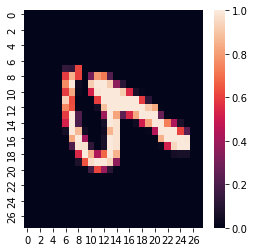

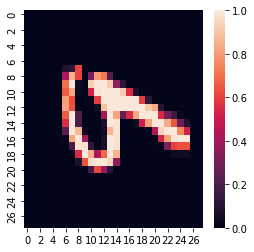

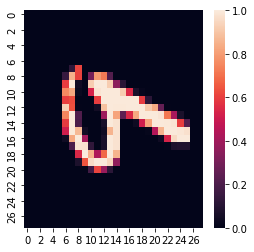

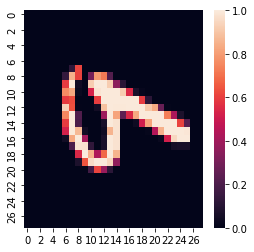

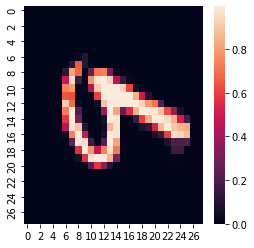

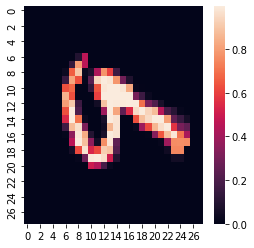

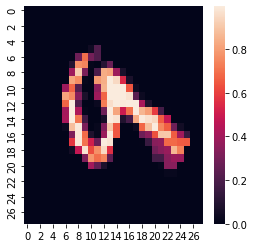

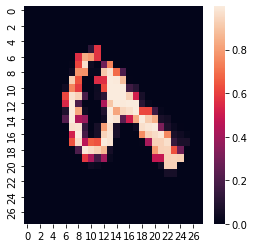

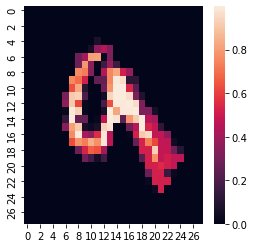

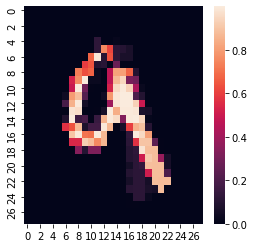

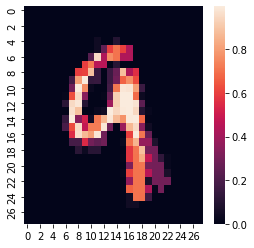

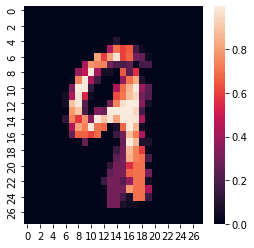

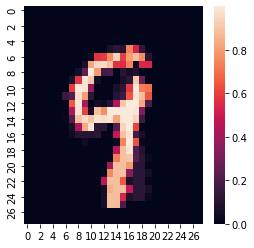

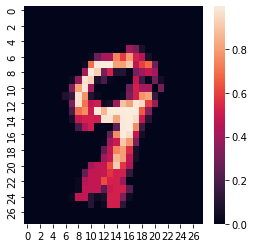

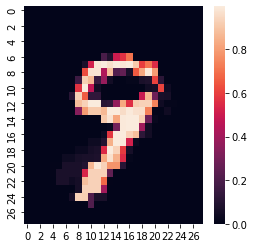

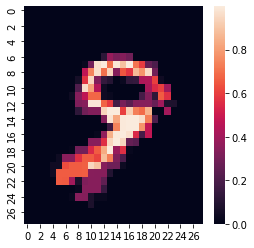

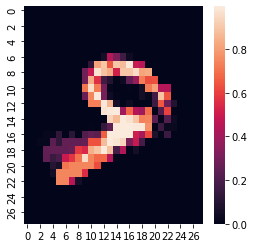

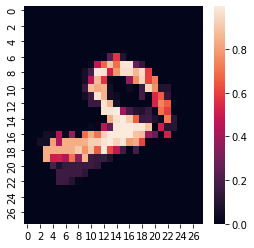

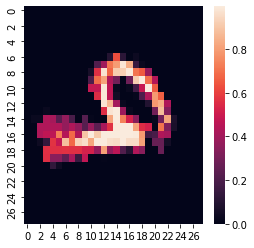

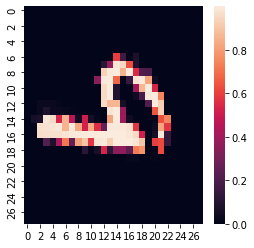

In [11]:
for i in range(20):
    fig = plt.figure(figsize=(4, 4))
    fig = sns.heatmap(frames[0, 0, i, :, :])
    plt.show()

In [9]:
num_arguments = frames.shape[1]
half_of_num_arguments = int(num_arguments // 2)
all_speed1 = all_speed[:, :half_of_num_arguments]
all_speed2 = all_speed[:, half_of_num_arguments:]

mini_batch_size = frames.shape[0]
shape = frames.shape[2:]
transform_shape = (mini_batch_size * num_arguments, *shape)
frames_transformed = frames.view(transform_shape)
# frames_transformed = frames_transformed.to(device)
# frames_transformed = frames_transformed
# all_z = model(frames, 'f')
all_z = model(frames_transformed, 'f')


RuntimeError: Given groups=1, weight of size [64, 1, 5, 3, 3], expected input[1, 40, 80, 28, 28] to have 1 channels, but got 40 channels instead

In [ ]:
frames.size()
# frames[0, 0, 0, :, :].numpy().shape

In [ ]:
sns.heatmap(frames[0, 0, 0, :, :].numpy())

In [ ]:
idx = 0
fig = plt.figure(figsize=(4, 4))
fig = sns.heatmap(frames[0, 0, 0, :, :].numpy())
plt.show()

In [ ]:
idx = 0
fig = plt.figure(figsize=(4, 4))
fig = sns.heatmap(frames[0, idx, :, :])
plt.show()

In [ ]:
for i in range(8):
    fig = plt.figure(figsize=(4, 4))
    fig = sns.heatmap(frames[0, 0, i, :, :])
    plt.show()

In [ ]:
rotation_digits = frames[0].view(150, -1).numpy()

In [ ]:
# model = m.SimPer(opt)
#
# # embedding = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(rotation_digits)
# param = torch.load('./params/model_0014.pth')
# model.load_state_dict(param)
# print('load complete')


In [ ]:
plt.figure(figsize=(6, 6))
# plt.scatter(embedding[:, 0], embedding[:, 1], c=, cmap='Spectral', s=5)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
# plt.gca().set_aspect('equal', 'datalim')


In [ ]:
import umap
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np

# データをロード
digits = load_digits()
data = digits.data
labels = digits.target

# UMAPで次元削減
embedding = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(data)

# プロット
plt.figure(figsize=(6, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24)
plt.show()


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Featurizer(nn.Module):
    def __init__(self, n_outputs):
        super(Featurizer, self).__init__()
        self.conv0 = nn.Conv3d(1, 64, (5, 3, 3), padding=(2, 1, 1))
        self.conv0_2 = nn.Conv3d(64, 64, (5, 3, 3), padding=(2, 1, 1))
        self.conv1 = nn.Conv3d(64, 128, (5, 3, 3), padding=(2, 1, 1))
        self.conv1_2 = nn.Conv3d(128, 128, (5, 3, 3), padding=(2, 1, 1))
        self.conv2 = nn.Conv3d(128, 128, (5, 3, 3), padding=(2, 1, 1))
        self.conv2_2 = nn.Conv3d(128, 128, (5, 3, 3), padding=(2, 1, 1))
        self.conv3 = nn.Conv3d(128, 1, (1, 1, 1))

        self.bn0 = nn.BatchNorm3d(64)
        self.bn1 = nn.BatchNorm3d(128)
        self.bn2 = nn.BatchNorm3d(128)
        self.bn3 = nn.BatchNorm3d(1)

        # self.pool0 = nn.MaxPool3d((1, 2, 2))
        # self.pool1 = nn.MaxPool3d((1, 2, 2))
        # self.pool2 = nn.MaxPool3d((1, 2, 2))
        # self.pool3 = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.pool0 = nn.MaxPool2d((2, 2))
        self.pool1 = nn.MaxPool2d((2, 2))
        self.pool2 = nn.MaxPool2d((2, 2))
        self.pool3 = nn.AdaptiveAvgPool2d((1, 1))

        self.flatten = nn.Flatten()

        self.n_outputs = n_outputs

    # def forward(self, x):
    #     x = self.pool0(F.relu(self.bn0(self.conv0(x))))
    #     x = self.pool1(F.relu(self.bn1(self.conv1(x))))
    #     # x = self.pool2(F.relu(self.bn2(self.conv2(x)))) # commented out as in original
    #     x = self.pool3(F.relu(self.bn3(self.conv3(x))))
    #     x = self.flatten(x)
    #     return x

    def forward(self, x):
        x = F.relu(self.bn0(self.conv0(x)))
        x = F.relu(self.bn0(self.conv0_2(x)))
        x = self.time_distributed(x, self.pool0)

        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn1(self.conv1_2(x)))
        x = self.time_distributed(x, self.pool1)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.time_distributed(x, self.pool3)

        x = self.flatten(x)
        return x

    def time_distributed(self, x, layer):
        channels = x.shape[1]
        sequence = x.shape[2]
        img_size = x.shape[3:]

        new_order = (0, 2, 1, 3, 4)  # Batch, Sequence, Channel, Height, Width
        x_trans = x.permute(new_order)
        new_shape = (channels, img_size[0], img_size[1])
        x_trans = x_trans.reshape(-1, *new_shape)  # Batch x Sequence, Channel, Height, Width
        out = layer(x_trans)
        img_size = out.shape[2:]
        out = out.reshape(-1, sequence, channels, img_size[0], img_size[1])
        out = out.permute(0, 2, 1, 3, 4)  # Batch, Channel, Sequence, Height, Width
        return out


class MLP(nn.Module):
    def __init__(self, n_outputs):
        super(MLP, self).__init__()
        self.inputs = nn.Linear(n_outputs, n_outputs)
        self.hidden = nn.Linear(n_outputs, n_outputs)
        self.outputs = nn.Linear(n_outputs, n_outputs)

    def forward(self, x):
        x = F.relu(self.inputs(x))
        # x = F.relu(self.hidden(x)) # commented out as in original
        x = self.outputs(x)
        return x


def Classifier(in_features, out_features, nonlinear=False):
    if nonlinear:
        return nn.Sequential(
            nn.Linear(in_features, in_features // 2),
            nn.ReLU(),
            nn.Linear(in_features // 2, in_features // 4),
            nn.ReLU(),
            nn.Linear(in_features // 4, out_features)
        )
    else:
        return nn.Linear(in_features, out_features)


class SimPer(nn.Module):
    def __init__(self, opt):
        super(SimPer, self).__init__()
        self.featurizer = Featurizer(opt.SSL_FRAMES)
        self.reg = Classifier(1, 1, False)
        self.network = nn.Sequential(*[self.featurizer, self.reg])

    def forward(self, x, inference='f'):
        if inference == 'f':
            out = self.featurizer(x)
        else:
            out = self.network(x)
        return out

